<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch5_ODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to solving ODEs

Much of this notebook is inspired by the [Driscoll and Braun ch 6 demo](https://github.com/tobydriscoll/fnc-extras/blob/master/python/Chapter06.ipynb); Matlab users can find the [Matlab demos of ch 6](https://github.com/tobydriscoll/fnc-extras/tree/master/fnc/examples/chapter06)

You can also see the [ODE notebook](https://github.com/cu-numcomp/numcomp-class/blob/master/DifferentialEquations.ipynb) for CSCI-3656 by Jed Brown.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import solve_ivp
mpl.rcParams["figure.figsize"] = [8,6] # or 7, 4 or 10,8
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["lines.markersize"] = 4
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'font.size': 20})

The equation $y'=\sin[(y+t)^2]$ also has a solution that can be found numerically with ease, even though no formula exists for its solution.

Let's approximate this solution from $t=0$ to $t=4$, starting at $y_0=-1$



In [7]:
f = lambda t,y: np.sin((t+y)**2);
tspan = [0.0,4.0];
y0 = [-1.0];

The solve_ivp function from scipy.integrate package offers solvers for a variety of initial-value problems. Note that even though this is a problem for a scalar function $y(t)$, we had to set the initial condition as a "one-dimensional vector."



In [11]:
sol = solve_ivp(f,tspan,y0)
print("t shape:",sol.t.shape)
print("y shape:",sol.y.shape)

t shape: (10,)
y shape: (1, 10)


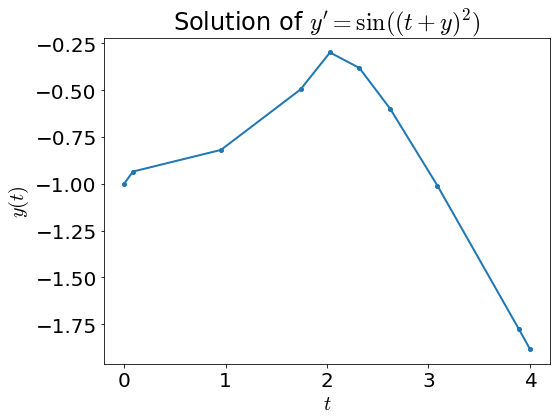

In [12]:
plt.plot(sol.t,sol.y[0,:],"-o")
plt.xlabel("$t$"); plt.ylabel("$y(t)$");
plt.title("Solution of $y'=\sin((t+y)^2)$");

You can see above that the solution was not computed at enough points to make a smooth graph. There is a way to request output at times of your choosing.

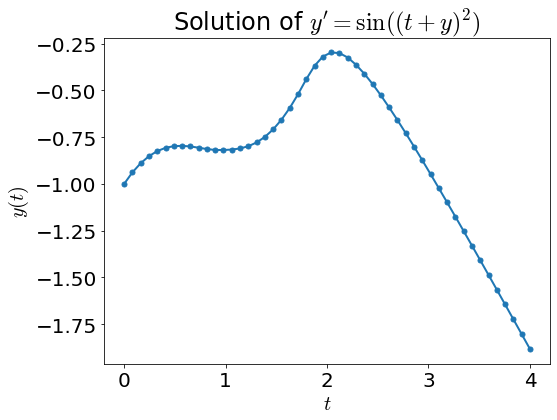

In [20]:
sol = solve_ivp(f,tspan,y0,t_eval=np.linspace(0,4,50))
plt.plot(sol.t,sol.y[0,:],".-",MarkerSize=10)
plt.xlabel("$t$"); plt.ylabel("$y(t)$");
plt.title("Solution of $y'=\sin((t+y)^2)$");

If we give `solve_ivp` the option `dense_output=True`, then we get a new field, `sol`

In [33]:
sol = solve_ivp(f,tspan,y0,dense_output=True)
print(sol)
print(f'The ODE solver used n = {sol.t.size} grid points')

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 68
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f09cc8c7940>
   status: 0
  success: True
        t: array([0.        , 0.08678069, 0.95458764, 1.73888574, 2.02903204,
       2.31917835, 2.62300083, 3.08829831, 3.89161802, 4.        ])
 t_events: None
        y: array([[-1.        , -0.93483006, -0.81915309, -0.49625635, -0.2987285 ,
        -0.38167713, -0.59984392, -1.01005605, -1.7767732 , -1.88221363]])
 y_events: None
The ODE solver used n = 10 grid points


so now our solution was not computed at arbitrary density (in fact only 10 grid points!!), but we can evaluate an interpolant of the solution at arbitrary density.

Note: the equivalent in Matlab is [`deval`](https://www.mathworks.com/help/matlab/ref/deval.html)

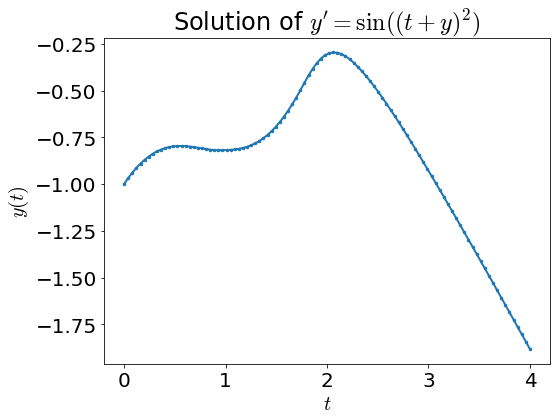

In [28]:
y_interpolated = sol.sol
t_points  = np.linspace(tspan[0],tspan[1],100)

plt.plot(t_points, y_interpolated(t_points)[0],".-",MarkerSize=5)
plt.xlabel("$t$"); plt.ylabel("$y(t)$");
plt.title("Solution of $y'=\sin((t+y)^2)$");

## Some ODE theory and phenomenon

The basic model for population growth is $$y' = ky$$ for some constant $k$. There is often reasonable motivation for this, e.g., let $y(t)$ be the population of people at time $t$, then if every person has one child, then the rate of growth of our population is proportional to our current population.  The closed-form solution, if $y(0)=y_0$, is $$y(t) = y_0e^{kt}.$$

The Malthusian model is $$y'' = ky^2.$$ You could argue for this in some settings, e.g., the more people there are, the better technology we create, so people live longer, or are more effective at finding partners (e.g., dating websites), etc. The closed form solution, if $y(0)=y_0$, is
$$y(t) = \frac{1}{1/y_0 - kt}.$$

The logistic model is $$y'' = ky(1-y)$$ which occurs when there is some carrying capacity (in this case, $1$) beyond which the population cannot expand. For example, a predator species that has too many individuals will exhaust all the food supplies in the region, and then predators will die and their population will stop growing.  The true solution is of the form
$$
y(t) = \frac{1}{ce^{-kt}+1},\quad c = 1/y_0 - 1
$$

#### Exponential growth

Success status of IVP solver is:  True
The ODE solver used n = 7 grid points


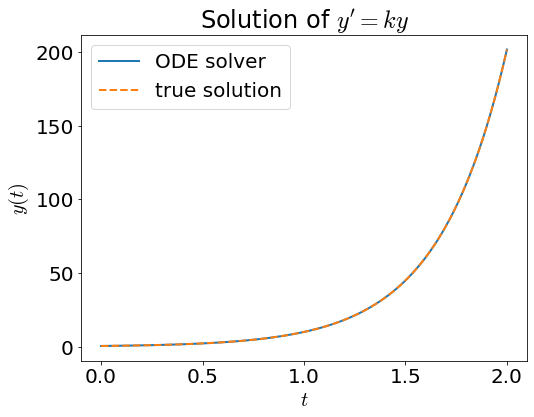

In [68]:
k = 3
y0 = [.5] # need it to be a vector
tspan = [0,2]

# Exponential growth
fExponential = lambda u, y : k*y
solExponential = solve_ivp(fExponential,tspan,y0,dense_output=True)
print('Success status of IVP solver is: ', solExponential.success )
y_interpolated = solExponential.sol
t_points  = np.linspace(tspan[0],tspan[1],100)

plt.plot(t_points, y_interpolated(t_points)[0],"-",label='ODE solver')
trueSoln = lambda t : y0*np.exp(k*t)
plt.plot(t_points, trueSoln(t_points),"--",label='true solution')
plt.xlabel("$t$"); plt.ylabel("$y(t)$");
plt.title("Solution of $y'=ky$");
plt.legend();
print(f'The ODE solver used n = {solExponential.t.size} grid points')

#### Malthusian growth

Success status of IVP solver is:  True
The ODE solver used n = 7 grid points


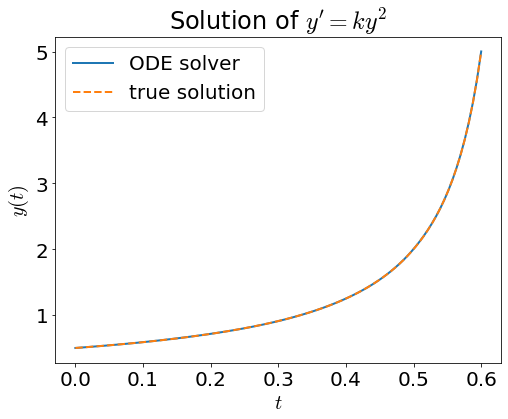

In [74]:
# Malthusian growth
tspan = [0,.6]
#tspan = [0,.68] # Try this
y0 = [.5] 
fMalthusian = lambda u, y : k*y**2
solMalthusian = solve_ivp(fMalthusian,tspan,y0,dense_output=True,
                          t_eval=np.linspace(tspan[0],tspan[1],150))
print('Success status of IVP solver is: ', solMalthusian.success )
y_interpolated = solMalthusian.sol
t_points  = np.linspace(tspan[0],tspan[1],100)

plt.plot(t_points, y_interpolated(t_points)[0],"-",label='ODE solver')
trueSoln = lambda t : 1/(1/y0[0]-k*t)
plt.plot(t_points, trueSoln(t_points),"--",label='true solution')
plt.xlabel("$t$"); plt.ylabel("$y(t)$");
plt.title("Solution of $y'=ky^2$");
print(f'The ODE solver used n = {solExponential.t.size} grid points')
plt.legend();

Try that again, for larger time values

Success status of IVP solver is:  False
The ODE solver used n = 7 grid points


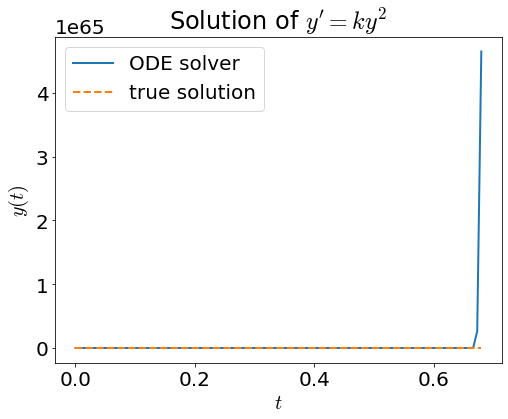

In [75]:
# Malthusian growth
tspan = [0,.68] # Try this
y0 = [.5] 
fMalthusian = lambda u, y : k*y**2
solMalthusian = solve_ivp(fMalthusian,tspan,y0,dense_output=True,
                          t_eval=np.linspace(tspan[0],tspan[1],150))
print('Success status of IVP solver is: ', solMalthusian.success )
y_interpolated = solMalthusian.sol
t_points  = np.linspace(tspan[0],tspan[1],100)

plt.plot(t_points, y_interpolated(t_points)[0],"-",label='ODE solver')
trueSoln = lambda t : 1/(1/y0[0]-k*t)
plt.plot(t_points, trueSoln(t_points),"--",label='true solution')
plt.xlabel("$t$"); plt.ylabel("$y(t)$");
plt.title("Solution of $y'=ky^2$");
print(f'The ODE solver used n = {solExponential.t.size} grid points')
plt.legend();

#### Logistic growth

Success status of IVP solver is:  True
The ODE solver used n = 8 grid points


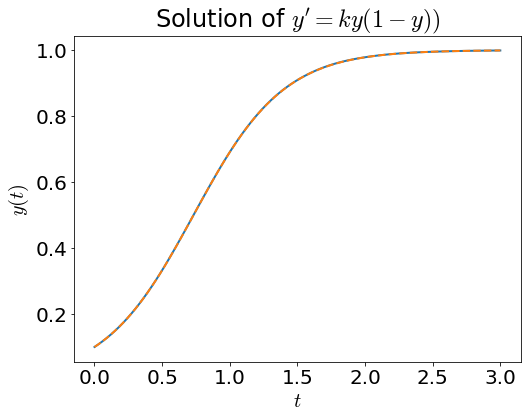

In [77]:
# Logistic growth
tspan = [0,3]
y0 = [.1] 
fLogistic = lambda u, y : k*y*(1-y)
solLogistic = solve_ivp(fLogistic,tspan,y0,dense_output=True)                          
print('Success status of IVP solver is: ', solLogistic.success )
y_interpolated = solLogistic.sol
t_points  = np.linspace(tspan[0],tspan[1],100)

def trueSoln(t):
  c = 1/y0[0] - 1
  return 1/(c*np.exp(-k*t)+1)

plt.plot(t_points, y_interpolated(t_points)[0],"-",label='ODE solver')
plt.plot(t_points, trueSoln(t_points),"--",label='true solution')

plt.xlabel("$t$"); plt.ylabel("$y(t)$");
plt.title("Solution of $y'=ky(1-y))$");
print(f'The ODE solver used n = {solLogistic.t.size} grid points')